# Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ayh17\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import TransformedTargetRegressor

# Data Generation

In [3]:
X, y = make_regression(n_samples=10000, noise=100, random_state=0)
y = np.expm1((y + abs(y.min())) / 200) # skewed target data
y_trans = np.log1p(y) # log transformation of skewed target data

# Visualization of Target Data

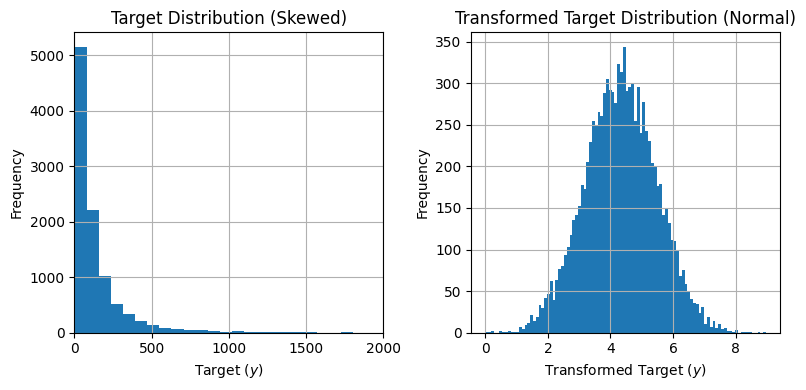

In [4]:
# target data
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
ax1.hist(y, bins=100)
ax1.set_xlim(0, 2000)
ax1.set_xlabel('Target ($y$)')
ax1.set_ylabel('Frequency')
ax1.set_title('Target Distribution (Skewed)')
ax1.grid()
ax2.hist(y_trans, bins=100)
ax2.set_xlabel('Transformed Target ($y$)')
ax2.set_ylabel('Frequency')
ax2.set_title('Transformed Target Distribution (Normal)')
ax2.grid()
fig.tight_layout()
plt.savefig('images/target_distribution.jpg');

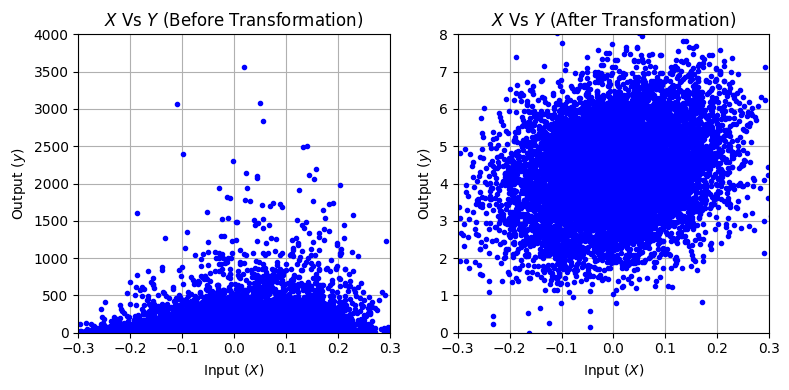

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
ax1.plot(X.mean(axis=1), y, 'b.')
ax1.set_xlim(-0.3, 0.3)
ax1.set_ylim(0, 4000)
ax1.set_xlabel('Input ($X$)')
ax1.set_ylabel('Output ($y$)')
ax1.set_title('$X$ Vs $Y$ (Before Transformation)')
ax1.grid()
ax2.plot(X.mean(axis=1), y_trans, 'b.')
ax2.set_xlim(-0.3, 0.3)
ax2.set_ylim(0, 8)
ax2.set_xlabel('Input ($X$)')
ax2.set_ylabel('Output ($y$)')
ax2.set_title('$X$ Vs $Y$ (After Transformation)')
ax2.grid()
fig.tight_layout()
plt.savefig('images/input_vs_output.jpg');

# Linear Regression

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
def compute_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return pd.Series([mse, mae, r2],
                     index=['mean squared error', 'mean absolute error', 'R squared'])

### Without Target Transformation

In [8]:
lin_reg = Ridge()

In [9]:
lin_reg.fit(X_train, y_train)

Ridge()

In [10]:
predictions1 = lin_reg.predict(X_test)

In [11]:
metrics1 = compute_metrics(y_test, predictions1)
metrics1

mean squared error     38205.159863
mean absolute error       96.758671
R squared                  0.353398
dtype: float64

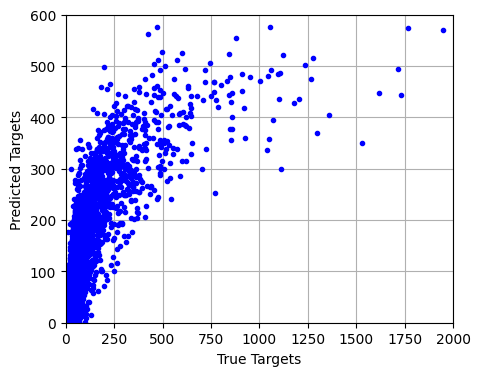

In [12]:
fig, ax = plt.subplots(figsize=(5,4))
plt.plot(y_test, predictions1, 'b.')
plt.xlim(0, 2000)
plt.ylim(0, 600)
plt.grid()
plt.xlabel('True Targets')
plt.ylabel('Predicted Targets')
plt.savefig('images/no_trans.jpg');

### With Target Transformation (using `TransformedTargetRegressor`)

In [13]:
lin_reg_trans = TransformedTargetRegressor(regressor = Ridge(),
                                           func = np.log1p,
                                           inverse_func=np.expm1)

In [14]:
lin_reg_trans.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Ridge())

In [15]:
predictions2 = lin_reg_trans.predict(X_test)

In [16]:
metrics2 = compute_metrics(y_test, predictions2)
metrics2

mean squared error     19199.457586
mean absolute error       55.229576
R squared                  0.675060
dtype: float64

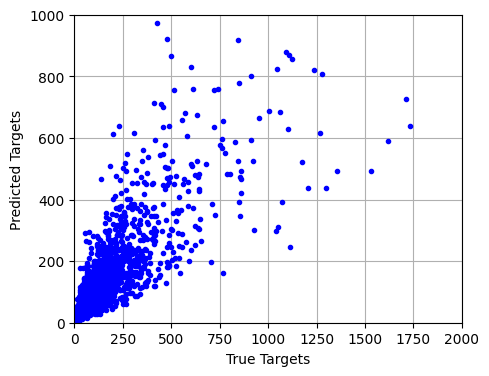

In [17]:
fig, ax = plt.subplots(figsize=(5,4))
plt.plot(y_test, predictions2, 'b.')
plt.xlim(0, 2000)
plt.ylim(0, 1000)
plt.grid()
plt.xlabel('True Targets')
plt.ylabel('Predicted Targets')
plt.savefig('images/trans.jpg');

### Manual Target Transformation

In [18]:
lin_reg.fit(X_train, np.log1p(y_train))

Ridge()

In [19]:
predictions3 = lin_reg.predict(X_test)

In [20]:
metrics3 = compute_metrics(y_test, np.expm1(predictions3))
metrics3

mean squared error     19199.457586
mean absolute error       55.229576
R squared                  0.675060
dtype: float64

# Comparison

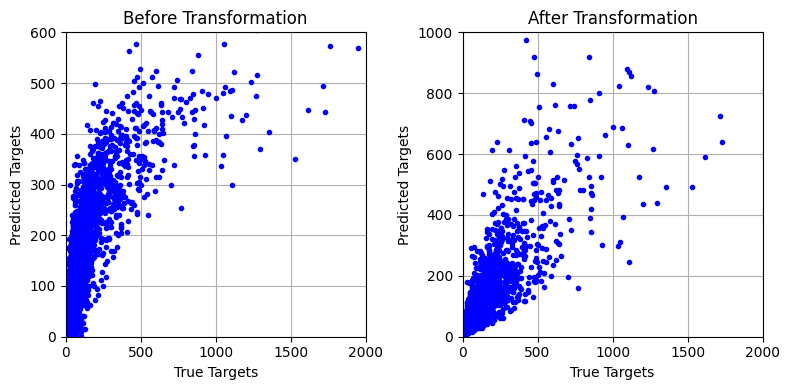

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
ax1.plot(y_test, predictions1, 'b.')
ax1.set_xlim(0, 2000)
ax1.set_ylim(0, 600)
ax1.grid()
ax1.set_xlabel('True Targets')
ax1.set_ylabel('Predicted Targets')
ax1.set_title('Before Transformation')

ax2.plot(y_test, predictions2, 'b.')
ax2.set_xlim(0, 2000)
ax2.set_ylim(0, 1000)
ax2.grid()
ax2.set_xlabel('True Targets')
ax2.set_ylabel('Predicted Targets')
ax2.set_title('After Transformation')

fig.tight_layout()

plt.savefig('images/before_after_trans.jpg');

In [22]:
metrics_df = pd.DataFrame()

In [23]:
metrics_df = metrics_df.assign(no_target_trans = metrics1,
                               target_trans = metrics2)

In [24]:
metrics_df

,no_target_trans,target_trans
mean squared error,38205.159863,19199.457586
mean absolute error,96.758671,55.229576
R squared,0.353398,0.675060


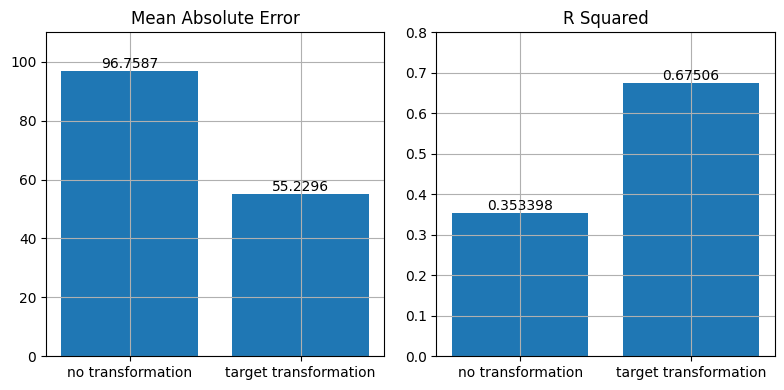

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))

rects1 = ax1.bar(metrics_df.loc['mean absolute error', :].index, metrics_df.loc['mean absolute error', :].values)

ax1.set_title('Mean Absolute Error')
ax1.set_xticks(ax1.get_xticks(), ['no transformation', 'target transformation'])
ax1.set_ylim(0,110)
ax1.grid()
ax1.bar_label(rects1)

rects2 = ax2.bar(metrics_df.loc['R squared', :].index, metrics_df.loc['R squared', :].values)
ax2.set_title('R Squared')
ax2.set_xticks(ax2.get_xticks(), ['no transformation', 'target transformation'])
ax2.set_ylim(0,0.8)
ax2.grid()
ax2.bar_label(rects2)

fig.tight_layout()
plt.savefig('images/metrics.jpg');